In [16]:
from matplotlib import pyplot as plt
from numpy import mean
import pandas as pd
import json
import numpy as np

def read_file(file_path: str):

    with open(file_path, 'r') as f:
        lines =  f.readlines()
        data = []

    for line in lines:
        json_data = json.loads(line)
        data.append(json_data)

    # Create a pandas DataFrame from the list of dictiona
    # ries
    df = pd.DataFrame(data)
    print(file_path.split('_')[0])
    if file_path.split('_')[0] == 'pr':
        df['precision'] = df['precision'].apply(np.array)
        df['recall'] = df['recall'].apply(np.array)
        df['thrs'] = df['thrs'].apply(np.array)
    else:
        df['tpr'] = df['tpr'].apply(np.array)
        df['fpr'] = df['fpr'].apply(np.array)
        df['thrs'] = df['thrs'].apply(np.array)

    return df
    
def compute_metrics(file_path: str, df: pd.DataFrame):
    epochs = df['epoch'].max() + 1
    best_fscores_means = []
    best_thrs_means = []
    best_fscores_stds = []
    best_thrs_stds = []
    for epoch in range(epochs):
        # print(f'Epoch {epoch}')
        epoch_wise_df = df[df['epoch'] == epoch]
        # print(df[df['epoch'] == epoch])
        if file_path.split('_')[0] == 'pr':
            beta = 0.5
            epoch_wise_df['fscore'] = ( 1 + beta**2 ) * ( epoch_wise_df['precision'] * epoch_wise_df['recall'] ) / ( (beta**2 * epoch_wise_df['precision']) + epoch_wise_df['recall'] )
        else:
            epoch_wise_df['fscore'] = epoch_wise_df['tpr'] - epoch_wise_df['fpr']
        epoch_wise_df['binded_thrs_fscore'] = epoch_wise_df.apply(lambda row: list(zip(row['fscore'], row['thrs'])), axis='columns')
        # print('Raw')
        # print(epoch_wise_df['binded_thrs_fscore'])
        epoch_wise_df['binded_thrs_fscore'] = epoch_wise_df['binded_thrs_fscore'].apply(sorted, key=lambda x: x[0]).apply(lambda e: e[::-1])
        # print('Sorted')
        # print(epoch_wise_df['binded_thrs_fscore'])
        best = []
        for i in range(len(epoch_wise_df)):
            # print(epoch_wise_df['binded_thrs_fscore'].iloc[i][0])
            best.append(epoch_wise_df['binded_thrs_fscore'].iloc[i][0])
        best_fscores, best_thrs = zip(*best)
        # print(f'Epoch best thrs  {best_thrs}')
        best_fscores_mean, best_thrs_mean = np.mean(best_fscores), np.mean(best_thrs)
        best_fscores_std, best_thrs_std = np.std(best_fscores), np.std(best_thrs)
        best_fscores_means.append(best_fscores_mean)
        best_thrs_means.append(best_thrs_mean)
        best_fscores_stds.append(best_fscores_std)
        best_thrs_stds.append(best_thrs_std)
    return best_fscores_means, best_thrs_means, best_fscores_stds, best_thrs_stds

def plot_figure(version, best_thrs_train: list, best_thrs_test: list, thrs_stds_train: list, thrs_stds_test: list, best_fscores_train: list, best_fscores_test: list, fscores_stds_train: list, fscores_stds_test: list, file_path: str, epochs):
    epochs += 1
    plt.figure()
    plt.style.use('dark_background')
    plt.ylabel(f'Mean Optimal {file_path.split("_")[0].capitalize()} thresholds')
    plt.xlabel('Epochs')
    plt.errorbar(range(epochs), best_thrs_train, fmt='-o', yerr=thrs_stds_train, label='train optimal thresholds')
    plt.errorbar(range(epochs), best_thrs_test, fmt='-o', yerr=thrs_stds_test, label='test optimal thresholds')
    plt.legend()
    fig_path = f'../figures/mean_optimal_{file_path.split("_")[0]}_{version}_thrs.png'
    print(f'figure path {fig_path}')
    plt.savefig(fig_path)
    plt.close()
    # Fscores
    plt.figure()
    plt.style.use('dark_background')
    plt.ylabel(f'Mean Optimal {file_path.split("_")[0].capitalize()} scores')
    plt.xlabel('Epochs')
    plt.errorbar(range(epochs), best_fscores_train, fmt='-o', yerr=fscores_stds_train, label='train optimal scoree')
    plt.errorbar(range(epochs), best_fscores_test, fmt='-o', yerr=fscores_stds_test, label='test optimal score')
    plt.legend()
    fig_path = f'../figures/mean_optimal_{file_path.split("_")[0]}_{version}_scores.png'
    print(f'figure path {fig_path}')
    plt.savefig(fig_path)
    plt.close()





In [20]:
df_roc_train = read_file('roc_curve_train_diff.json')
df_roc_test = read_file('roc_curve_test_diff.json')
# df_roc_train = read_file('roc_curve_train_diff.json')
# df_roc_test = read_file('roc_curve_test_diff.json')

roc
roc


In [9]:
df_roc_test[df_roc_test['epoch'] == 0]



,time,epoch,fpr,tpr,thrs
0,1.690993e+09,0,"[0.0, 0.0, 0.0, 0.00909090909090909, 0.0090909...","[0.0, 0.009900990099009901, 0.504950495049505,...","[inf, 0.5988062620162964, 0.5263492465019226, ..."
50,1.690994e+09,0,"[0.0, 0.0, 0.0, 0.008771929824561403, 0.008771...","[0.0, 0.010309278350515464, 0.0927835051546391...","[inf, 0.5457559823989868, 0.5052907466888428, ..."
100,1.690995e+09,0,"[0.0, 0.0, 0.0, 0.007575757575757576, 0.007575...","[0.0, 0.012658227848101266, 0.379746835443038,...","[inf, 0.6515368819236755, 0.5810288786888123, ..."
150,1.690996e+09,0,"[0.0, 0.0, 0.0, 0.00847457627118644, 0.0084745...","[0.0, 0.010752688172043012, 0.0322580645161290...","[inf, 0.5505043268203735, 0.5364449620246887, ..."
200,1.690997e+09,0,"[0.0, 0.0, 0.0, 0.008620689655172414, 0.008620...","[0.0, 0.010526315789473684, 0.1157894736842105...","[inf, 0.5266705751419067, 0.4967315196990967, ..."
250,1.690998e+09,0,"[0.0, 0.0, 0.0, 0.008547008547008548, 0.008547...","[0.0, 0.010638297872340425, 0.3829787234042553...","[inf, 0.6672584414482117, 0.6068790555000305, ..."
300,1.690999e+09,0,"[0.0, 0.0, 0.0, 0.009259259259259259, 0.009259...","[0.0, 0.009708737864077669, 0.4951456310679611...","[inf, 0.6769136786460876, 0.5658830404281616, ..."
350,1.691001e+09,0,"[0.0, 0.0, 0.0, 0.008928571428571428, 0.008928...","[0.0, 0.010101010101010102, 0.2828282828282828...","[inf, 0.6929584741592407, 0.6197182536125183, ..."
400,1.691002e+09,0,"[0.0, 0.0, 0.0, 0.008771929824561403, 0.008771...","[0.0, 0.010309278350515464, 0.2783505154639175...","[inf, 0.4516415596008301, 0.36983975768089294,..."
450,1.691003e+09,0,"[0.0, 0.0, 0.0, 0.009523809523809525, 0.009523...","[0.0, 0.009433962264150943, 0.3679245283018867...","[inf, 0.5123986601829529, 0.4312260150909424, ..."


In [22]:
best_fscores_train, best_thrs_train, fscores_stds_train, thrs_stds_train = compute_metrics('roc_curve_train_diff.json', df=df_roc_train)
best_fscores_test, best_thrs_test, fscores_stds_test, thrs_stds_test = compute_metrics('roc_curve_test_diff.json', df=df_roc_test)
print(f'Means {thrs_stds_train}')
print(f'Stds {thrs_stds_test}')

Means [0.08764296234345473, 0.3499444306391207, 0.45572538110411187, 0.46773360993718716, 0.4869147450854833, 0.47136957353125325, 0.4283666998261327, 0.46859132471343956, 0.4747370499612335, 0.39614366256727024, 0.3586764499764895, 0.3558397631357842, 0.3845529449167289, 0.35940806558372757, 0.15016726257918617, 0.2611849150080494, 0.17604937094109321, 0.34260627425288076, 0.32228062292851245, 0.36617502627975596, 0.3476852212430524, 0.34333733231920655, 0.30332799102961855, 0.21362893260744453, 0.3142847650366548, 0.1914108818383888, 0.4005430377146286, 0.24702356004192877, 0.2134932277746276, 0.2648970047976974, 0.2920281487230834, 0.328641694770531, 0.28257790710756864, 0.31791205527198374, 0.13456291305711568, 0.25613791005658115, 0.2637730347747714, 0.32987006867447355, 0.2761087616133358, 0.23750002249064273, 0.2506307527137624, 0.25561660723316787, 0.2941820721889448, 0.22930394281524027, 0.3045018381954928, 0.2753981771089558, 0.25344559737398725, 0.263930298090246, 0.19306593

/var/folders/_n/014x9c6d20z1bbs9b8_8kby80000gn/T/ipykernel_1172/3175867313.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epoch_wise_df['fscore'] = epoch_wise_df['tpr'] - epoch_wise_df['fpr']
/var/folders/_n/014x9c6d20z1bbs9b8_8kby80000gn/T/ipykernel_1172/3175867313.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epoch_wise_df['binded_thrs_fscore'] = epoch_wise_df.apply(lambda row: list(zip(row['fscore'], row['thrs'])), axis='columns')
/var/folders/_n/014x9c6d20z1bbs9b8_8kby80000gn/T/ipykernel_11

In [23]:


# compute_metrics('pr_curve_test.json', df_pr_test)
# compute_metrics('roc_curve_train.json', df_roc_train)
# compute_metrics('roc_curve_test.json', df_roc_test)

plot_figure(
    version='v2',
    best_thrs_train=best_thrs_train,
    best_thrs_test=best_thrs_test,
    thrs_stds_train=thrs_stds_train,
    thrs_stds_test=thrs_stds_test,
    best_fscores_train=best_fscores_train,
    best_fscores_test=best_fscores_test,
    fscores_stds_train=fscores_stds_train,
    fscores_stds_test=fscores_stds_test,
    file_path='roc_curve_test_diff.json',
    epochs=df_roc_train['epoch'].max(),
    )


figure path ../figures/mean_optimal_roc_v2_thrs.png
figure path ../figures/mean_optimal_roc_v2_scores.png


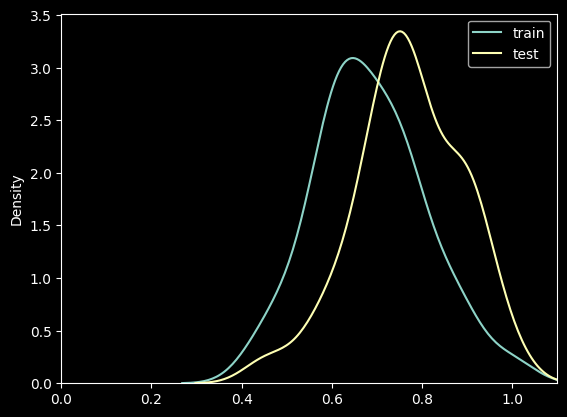

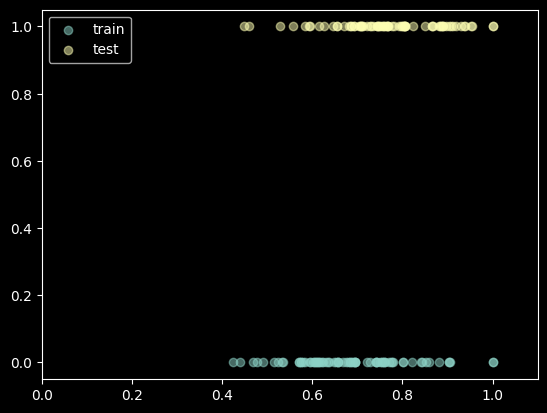

In [8]:
import seaborn as sns
sns.kdeplot(best_thrs_train, label='train')
sns.kdeplot(best_thrs_test, label='test')
plt.xlim((0, 1.1))
plt.legend()
plt.show()
zeros = np.zeros(len(best_thrs_train))
ones = np.ones(len(best_thrs_train))
plt.scatter(best_thrs_train, zeros, label='train', alpha=0.5)
plt.scatter(best_thrs_test, ones, label='test', alpha=0.5)
plt.xlim((0, 1.1))
plt.legend()
plt.show()

In [29]:
import torch
model = torch.load('model.pth')



In [ ]:
model